In [3]:
from datetime import date

In [4]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive', force_remount=True)

NVDA_url = "/content/drive/Shared drives/257data/NVIDIApricehistory.csv"
NVDQ_url = "/content/drive/Shared drives/257data/NVDQpricehistory.csv"
NVDA_data = pd.read_csv(NVDA_url)
NVDQ_data = pd.read_csv(NVDQ_url)

Mounted at /content/drive


In [5]:
NVDA_data.dropna(inplace=True)
print(NVDA_data)
NVDQ_data.dropna(inplace=True)
print(NVDQ_data)

           Date    Open    High     Low  Close   Adj Close          Volume
0     25-Nov-24  141.99  142.05  135.82  136.02      136.02    344,941,900
1     22-Nov-24  145.93  147.16  141.10  141.95      141.95    236,406,200
2     21-Nov-24  149.35  152.89  140.70  146.67      146.67    400,946,600
3     20-Nov-24  147.41  147.56  142.73  145.89      145.89    309,871,700
4     19-Nov-24  141.32  147.13  140.99  147.01      147.01    227,834,900
...         ...     ...     ...     ...     ...         ...            ...
6553  28-Jan-99    0.04    0.04    0.04    0.04        0.04    227,520,000
6554  27-Jan-99    0.04    0.04    0.04    0.04        0.04    244,368,000
6555  26-Jan-99    0.05    0.05    0.04    0.04        0.04    343,200,000
6556  25-Jan-99    0.04    0.05    0.04    0.05        0.04    510,480,000
6557  22-Jan-99    0.04    0.05    0.04    0.04        0.04  2,714,688,000

[6504 rows x 7 columns]
          Date    Open    High     Low  Close   Adj Close       Volume
0   

In [6]:
NVDA_data['Date'] = pd.to_datetime(NVDA_data['Date'], format='%d-%b-%y') #original dataset has different timeformat compared to pandas expects
print(NVDA_data)
NVDQ_data['Date'] = pd.to_datetime(NVDQ_data['Date'], format='%d-%b-%y')
print(NVDQ_data)

NVDA_data.columns = NVDA_data.columns.str.strip() #column names have random spaces at the end
NVDQ_data.columns = NVDQ_data.columns.str.strip()

NVDA_data['Open'] = NVDA_data['Open'].str.replace(',', '').astype(float) #some of the data set includes commas in the numbers, stripped it and coverted to float
NVDA_data['Volume'] = NVDA_data['Volume'].str.replace(',', '').astype(float)
NVDQ_data['Open'] = NVDQ_data['Open'].str.replace(',', '').astype(float)
NVDQ_data['Volume'] = NVDQ_data['Volume'].str.replace(',', '').astype(float)

print("Attribute Names:", NVDA_data.columns)
print(NVDA_data.dtypes)
print("Attribute Names:", NVDQ_data.columns)
print(NVDQ_data.dtypes)

           Date    Open    High     Low  Close   Adj Close          Volume
0    2024-11-25  141.99  142.05  135.82  136.02      136.02    344,941,900
1    2024-11-22  145.93  147.16  141.10  141.95      141.95    236,406,200
2    2024-11-21  149.35  152.89  140.70  146.67      146.67    400,946,600
3    2024-11-20  147.41  147.56  142.73  145.89      145.89    309,871,700
4    2024-11-19  141.32  147.13  140.99  147.01      147.01    227,834,900
...         ...     ...     ...     ...     ...         ...            ...
6553 1999-01-28    0.04    0.04    0.04    0.04        0.04    227,520,000
6554 1999-01-27    0.04    0.04    0.04    0.04        0.04    244,368,000
6555 1999-01-26    0.05    0.05    0.04    0.04        0.04    343,200,000
6556 1999-01-25    0.04    0.05    0.04    0.05        0.04    510,480,000
6557 1999-01-22    0.04    0.05    0.04    0.04        0.04  2,714,688,000

[6504 rows x 7 columns]
          Date    Open    High     Low  Close   Adj Close       Volume
0   

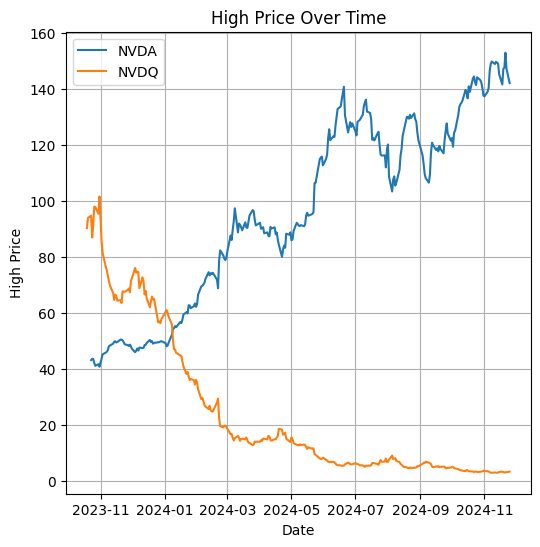

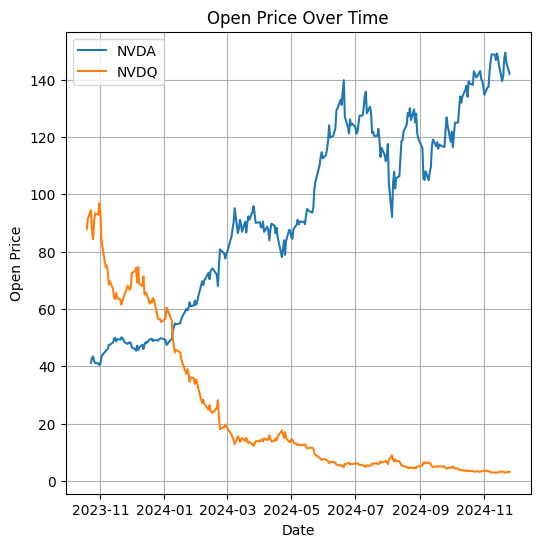

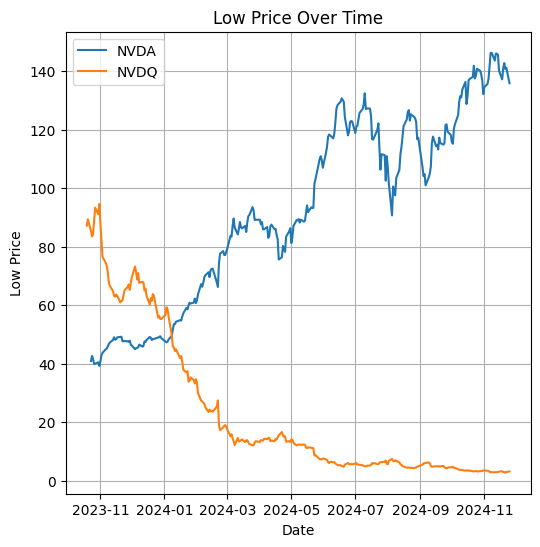

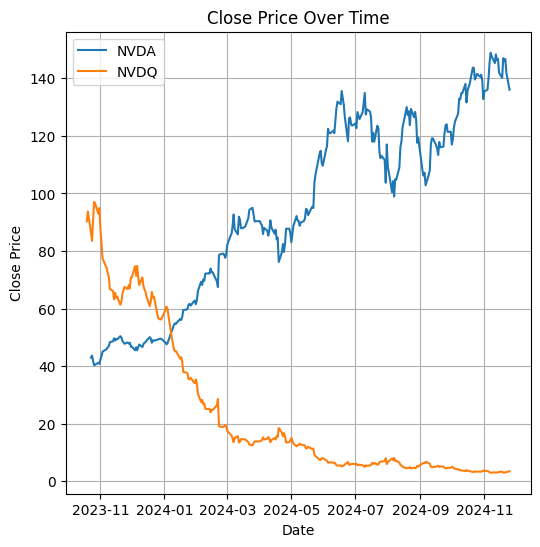

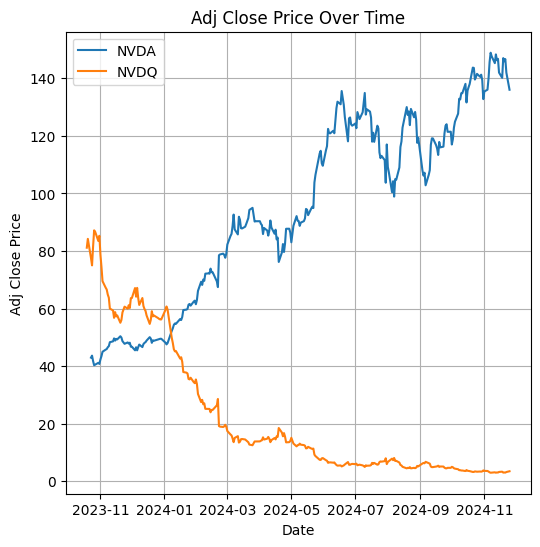

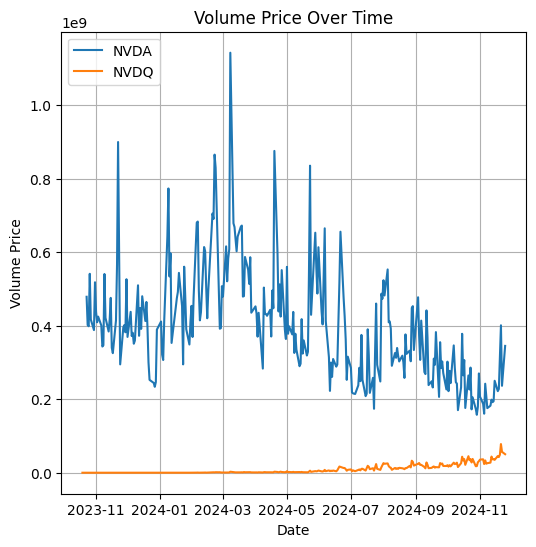

In [7]:
import matplotlib.pyplot as plt

start_date = '2023-10-23' #for visualization
NVDA_data_filtered = NVDA_data[NVDA_data['Date'] >= pd.to_datetime(start_date)]

plt.figure(figsize=(6,6))
plt.plot(NVDA_data_filtered['Date'], NVDA_data_filtered['High'], label='NVDA')
plt.plot(NVDQ_data['Date'], NVDQ_data['High'] , label='NVDQ')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High Price Over Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(6,6))
plt.plot(NVDA_data_filtered['Date'], NVDA_data_filtered['Open'], label='NVDA')
plt.plot(NVDQ_data['Date'], NVDQ_data['Open'] , label='NVDQ')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Price Over Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(6,6))
plt.plot(NVDA_data_filtered['Date'], NVDA_data_filtered['Low'], label='NVDA')
plt.plot(NVDQ_data['Date'], NVDQ_data['Low'] , label='NVDQ')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low Price Over Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(6,6))
plt.plot(NVDA_data_filtered['Date'], NVDA_data_filtered['Close'], label='NVDA')
plt.plot(NVDQ_data['Date'], NVDQ_data['Close'] , label='NVDQ')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(6,6))
plt.plot(NVDA_data_filtered['Date'], NVDA_data_filtered['Adj Close'], label='NVDA')
plt.plot(NVDQ_data['Date'], NVDQ_data['Adj Close'] , label='NVDQ')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Adj Close Price Over Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(6,6))
plt.plot(NVDA_data_filtered['Date'], NVDA_data_filtered['Volume'], label='NVDA')
plt.plot(NVDQ_data['Date'], NVDQ_data['Volume'] , label='NVDQ')
plt.xlabel('Date')
plt.ylabel('Volume Price')
plt.title('Volume Price Over Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


I assume since we need to predict 4 outputs per stock (8 in total), we do something like this (Open and Closing Price are the two critical items)
open, high, low, and close maybe highly correlated

*   model 1 predict Open using High, Low, Close, Adj Close, Volume
*   model 2 predict High using Open, Low, Close, Adj Close, Volume
*   model 3 predict Low using High, Open, Close, Adj Close, Volume
*   model 4 predict Close using High, Low, Open, Adj Close, Volume

Potential to add features such as daily variation/return,
good article that explains potential feature engineering: https://medium.com/aimonks/improving-stock-price-forecasting-by-feature-engineering-8a5d0be2be96




models pros/cons:

**linear regression**

pros: simple implementation to predict historical trend

cons: may not capture trends or seasonality of the data to the linear prediction structure

**Decision trees/random forest/XGBoost**

pros: better at handling non-linear data/trends

cons: cannot recall if professor taught these in class and are allowed to use them, did learn them in CMPE255 class

**LSTM**

pros: popular for stock predictions due to the long & short term memory prediction based on nueral network, possibility to do Gradient Decent optimization

cons: personally not familar with this as unsure if we are allowed to use this method as well

**Single Layer Perceptron**

pros: very simple to implement and customize

cons: stock data isn't linear, may not be very accurate

**Multi Layer Perceptron**

pros: better at estimating complex and non-linear data

cons: maybe complex to implement?

**Evaluation Metric Ideas**

MSE, RMSE, MAE,

Split the Training Test data to preserve temporal structure, example

Training October 2023 - October 2024

Testing: November 2024 data

Also note, using old data 1999-2015 for example can introduce bias, market is very different compared pre covid and especially pre 2008

*NOTE:*  the original dataset is continously live updating as days go by, we may need to add new datapoints to the data set to better estimate Nov/Dec

Question: How will user make a query? Provide a specific date? How will the other inputs be derived? Such as current date's open/high/close prices? Query the current stock list?

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

start_date = '2020-01-01' #for calculation
NVDA_data_reduced_plot = NVDA_data[NVDA_data['Date'] >= pd.to_datetime(start_date)]

NVDA_data_reduced_plot.set_index('Date', inplace=True)
NVDA_data_reduced_plot = NVDA_data_reduced_plot.asfreq('D', method='pad')

<Figure size 1200x1200 with 0 Axes>

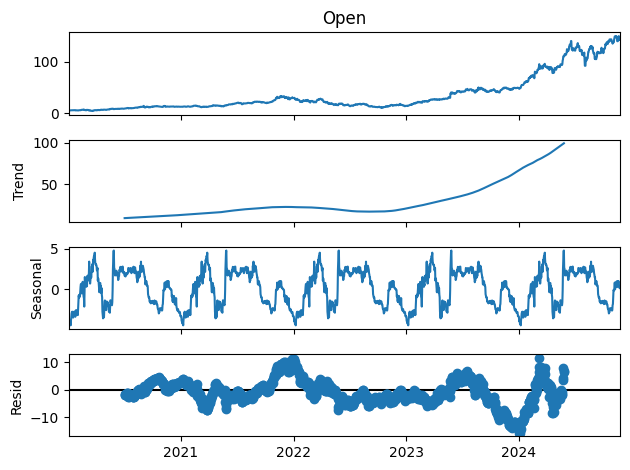

In [9]:
import matplotlib.dates as mdates
output = seasonal_decompose(NVDA_data_reduced_plot['Open'], period=365)
plt.figure(figsize=(12, 12))
output.plot();
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
plt.show()

In [10]:
import numpy as np

print(NVDA_data)
print(NVDQ_data)

NVDA_data.dropna(inplace=True)
NVDA_data = NVDA_data.reset_index(drop=True)
NVDQ_data.dropna(inplace=True)
NVDQ_data = NVDQ_data.reset_index(drop=True)

start_date = '2024-08-01' #for calculation use just 4 month data, maybe we can try iterating over this to see which produces best results
NVDA_data_reduced = NVDA_data[NVDA_data['Date'] >= pd.to_datetime(start_date)]
NVDA_data_reduced = NVDA_data_reduced.copy() #excluding causes some warning about splice
NVDQ_data_reduced = NVDQ_data[NVDQ_data['Date'] >= pd.to_datetime(start_date)]
NVDQ_data_reduced = NVDQ_data_reduced.copy() #excluding causes some warning about splice

days_to_predict = 1
for day in range(1, days_to_predict + 1):
    NVDA_data_reduced.loc[:, f'high_price_day{day}_NVDA'] = NVDA_data_reduced['High'].shift(day)
    NVDA_data_reduced.loc[:, f'low_price_day{day}_NVDA'] = NVDA_data_reduced['Low'].shift(day)
    NVDA_data_reduced.loc[:, f'close_price_day{day}_NVDA'] = NVDA_data_reduced['Close'].shift(day)
    NVDA_data_reduced.loc[:, f'open_price_day{day}_NVDA'] = NVDA_data_reduced['Open'].shift(day)
    NVDA_data_reduced.loc[:, f'volume_price_day{day}_NVDA'] = NVDA_data_reduced['Volume'].shift(day)
    NVDA_data_reduced.loc[:, f'adj_close_price_day{day}_NVDA'] = NVDA_data_reduced['Adj Close'].shift(day)

for day in range(1, days_to_predict + 1):
    NVDA_data_reduced.loc[:, f'high_price_day{day}_NVDQ'] = NVDQ_data_reduced['High'].shift(day)
    NVDA_data_reduced.loc[:, f'low_price_day{day}_NVDQ'] = NVDQ_data_reduced['Low'].shift(day)
    NVDA_data_reduced.loc[:, f'close_price_day{day}_NVDQ'] = NVDQ_data_reduced['Close'].shift(day)
    NVDA_data_reduced.loc[:, f'open_price_day{day}_NVDQ'] = NVDQ_data_reduced['Open'].shift(day)
    NVDA_data_reduced.loc[:, f'volume_price_day{day}_NVDQ'] = NVDQ_data_reduced['Volume'].shift(day)
    NVDA_data_reduced.loc[:, f'adj_close_price_day{day}_NVDQ'] = NVDQ_data_reduced['Adj Close'].shift(day)

NVDA_data_reduced.dropna(inplace=True)
NVDA_data_reduced = NVDA_data_reduced.reset_index(drop=True)
NVDQ_data_reduced = NVDQ_data_reduced[1:]
NVDQ_data_reduced = NVDQ_data_reduced.reset_index(drop=True)

start_date = '2024-11-01' #split for test/train portion
NVDA_test_data = NVDA_data_reduced[NVDA_data_reduced['Date'] >= pd.to_datetime(start_date)]
NVDA_train_data = NVDA_data_reduced[NVDA_data_reduced['Date'] < pd.to_datetime(start_date)]
NVDQ_test_data = NVDQ_data_reduced[NVDQ_data_reduced['Date'] >= pd.to_datetime(start_date)]
NVDQ_train_data = NVDQ_data_reduced[NVDQ_data_reduced['Date'] < pd.to_datetime(start_date)]

input_query_data_database = pd.concat([NVDA_data[['Date', 'High', 'Low', 'Close', 'Open', 'Volume', 'Adj Close']],
                               NVDQ_data[['High', 'Low', 'Close', 'Open', 'Volume', 'Adj Close']]], axis=1)

input_query_data_database.dropna(inplace=True)
input_query_data_database = input_query_data_database.reset_index(drop=True)


x_NVDA_train_data = pd.concat([NVDA_train_data[['Date', 'High', 'Low', 'Close', 'Open', 'Volume', 'Adj Close']],
                               NVDQ_train_data[['High', 'Low', 'Close', 'Open', 'Volume', 'Adj Close']]], axis=1)

y_NVDA_train_data = NVDA_train_data[[
        'high_price_day1_NVDA',
        'low_price_day1_NVDA',
        'close_price_day1_NVDA',
        'open_price_day1_NVDA',
        'volume_price_day1_NVDA',
        'adj_close_price_day1_NVDA',
        'high_price_day1_NVDQ',
        'low_price_day1_NVDQ',
        'close_price_day1_NVDQ',
        'open_price_day1_NVDQ',
        'volume_price_day1_NVDQ',
        'adj_close_price_day1_NVDQ',
        ]]

x_NVDA_test_data = pd.concat([NVDA_test_data[['Date', 'High', 'Low', 'Close', 'Open', 'Volume', 'Adj Close']],
                               NVDQ_test_data[['High', 'Low', 'Close', 'Open', 'Volume', 'Adj Close']]], axis=1)
y_NVDA_test_data = NVDA_test_data[[
        'high_price_day1_NVDA',
        'low_price_day1_NVDA',
        'close_price_day1_NVDA',
        'open_price_day1_NVDA',
        'volume_price_day1_NVDA',
        'adj_close_price_day1_NVDA',
        'high_price_day1_NVDQ',
        'low_price_day1_NVDQ',
        'close_price_day1_NVDQ',
        'open_price_day1_NVDQ',
        'volume_price_day1_NVDQ',
        'adj_close_price_day1_NVDQ'
        ]]

           Date    Open    High     Low   Close  Adj Close        Volume
0    2024-11-25  141.99  142.05  135.82  136.02     136.02  3.449419e+08
1    2024-11-22  145.93  147.16  141.10  141.95     141.95  2.364062e+08
2    2024-11-21  149.35  152.89  140.70  146.67     146.67  4.009466e+08
3    2024-11-20  147.41  147.56  142.73  145.89     145.89  3.098717e+08
4    2024-11-19  141.32  147.13  140.99  147.01     147.01  2.278349e+08
...         ...     ...     ...     ...     ...        ...           ...
6553 1999-01-28    0.04    0.04    0.04    0.04       0.04  2.275200e+08
6554 1999-01-27    0.04    0.04    0.04    0.04       0.04  2.443680e+08
6555 1999-01-26    0.05    0.05    0.04    0.04       0.04  3.432000e+08
6556 1999-01-25    0.04    0.05    0.04    0.05       0.04  5.104800e+08
6557 1999-01-22    0.04    0.05    0.04    0.04       0.04  2.714688e+09

[6504 rows x 7 columns]
          Date    Open    High     Low   Close  Adj Close      Volume
0   2024-11-25   3.215   3.49

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

model = RandomForestRegressor()

hyper_parameter_list = {
    'n_estimators': [100, 200, 300],
     'max_depth': [10, 20, 30, None],
}

x_NVDA_train_data = x_NVDA_train_data.copy()
x_NVDA_test_data = x_NVDA_test_data.copy()

x_NVDA_train_data['Date'] = pd.to_datetime(x_NVDA_train_data['Date'])
x_NVDA_train_data['Date'] = x_NVDA_train_data['Date'].astype('int64')
x_NVDA_test_data['Date'] = pd.to_datetime(x_NVDA_test_data['Date'])
x_NVDA_test_data['Date'] = x_NVDA_test_data['Date'].astype('int64')

grid = GridSearchCV(estimator=model, param_grid=hyper_parameter_list)

grid.fit(x_NVDA_train_data, y_NVDA_train_data)

print(f"Best hyperparameters: {grid.best_params_}")
best_model = grid.best_estimator_
predictions = best_model.predict(x_NVDA_test_data)

mae = mean_absolute_error(y_NVDA_test_data.iloc[:, :3], predictions[:, :3]) #we only care to predict the first 3
print(y_NVDA_test_data)
print(predictions)
print(f"Mean Absolute Error: {mae}")

Best hyperparameters: {'max_depth': None, 'n_estimators': 300}
    high_price_day1_NVDA  low_price_day1_NVDA  close_price_day1_NVDA  \
0                 142.05               135.82                 136.02   
1                 147.16               141.10                 141.95   
2                 152.89               140.70                 146.67   
3                 147.56               142.73                 145.89   
4                 147.13               140.99                 147.01   
5                 141.55               137.15                 140.15   
6                 145.24               140.08                 141.98   
7                 149.00               145.55                 146.76   
8                 149.33               145.90                 146.27   
9                 149.65               146.01                 148.29   
10                148.85               143.57                 145.26   
11                149.77               146.26                 147.63   
1

Current issues with Random Forest Implementation



*   Low, high, and open are trained seperately, there could be a senario where the model predicts a low value > high value that day
*   Seems difficult for the user to query as it requires the current day's open, high, low, closing prices as reference. It's possible to pull this information but the professor may run this model on a later date where the data points (Dec 17) isn't avaiable whenver we trained the model.
*   There is a few options finding next 5 days for the model.

Option 1: use the user provided data point to predict "day 1" value. Use "day 1" point to predict "day 2" repeat unil day 5.

Option 2: Predict all 5 days at once. Feature engineer some output samples "Day-1, Day-2, Day-3, Day-4, Day-5" and train the model with it to output all 5 days". Therefore one query should provide all the results.














In [12]:
from datetime import timedelta

input_date = '2024-11-25' #format for query YYYY-MM-DD

latest_date_avaiable = input_query_data_database[input_query_data_database['Date'] == input_date]
if latest_date_avaiable.empty:
  latest_input_query = input_query_data_database.sort_values(by='Date', ascending=False).head(1) #replaced tail with head, as tails picked the first date instead of the latest, this method may have issues if user selects weekend
  latest_date_avaiable = latest_input_query['Date']
  latest_date_avaiable = pd.to_datetime(latest_date_avaiable).iloc[0]
  input_date = pd.to_datetime(input_date)
else:
  latest_input_query = input_query_data_database[input_query_data_database['Date'] == input_date]
  latest_date_avaiable = input_date
  latest_date_avaiable = pd.to_datetime(latest_date_avaiable)
  input_date = pd.to_datetime(input_date)

latest_input_query = latest_input_query.copy()
latest_input_query['Date'] = pd.to_datetime(latest_input_query['Date'])
latest_input_query['Date'] = latest_input_query['Date'].astype('int64')

if (input_date != latest_date_avaiable):
  while(latest_date_avaiable < input_date):
    latest_date_avaiable = latest_date_avaiable + timedelta(days=1)
    if latest_date_avaiable.weekday() == 5 or latest_date_avaiable.weekday() == 6: #skip saturday and sunday
        continue
    predictions = best_model.predict(latest_input_query)
    #predictions = best_model.predict(latest_input_query)
    latest_input_query['Date'] = int(latest_date_avaiable.timestamp()) * 10**9
    latest_input_query.iloc[:, 1:] = predictions

#print(latest_date_avaiable)
#print(latest_input_query)

results = np.zeros((5, 12))
i = 0
while(i < 5):
  latest_date_avaiable = latest_date_avaiable + timedelta(days=1)
  if latest_date_avaiable.weekday() == 5 or latest_date_avaiable.weekday() == 6: #skip saturday and sunday
      continue
  predictions = best_model.predict(latest_input_query)
  #predictions = best_model.predict(latest_input_query)
  results[i, :] = predictions
  latest_input_query['Date'] = int(latest_date_avaiable.timestamp()) * 10**9
  latest_input_query.iloc[:, 1:] = predictions
  i += 1

print(results[:, :3])

[[140.64643333 137.2606     138.8462    ]
 [140.5023     136.5849     137.98653333]
 [139.35453333 134.69916667 135.99836667]
 [138.5653     134.3383     135.7082    ]
 [138.46973333 134.3769     135.7246    ]]
